# Анализ зарплат в России
В проекте использованы открытые данные из официальных источников:
[Сайт Росстата](https://rosstat.gov.ru/)  
[Таблицы уровня инфляции в России](https://уровень-инфляции.рф/).  
Для анализа выбраны виды экономичесой деятельности:
- образование,
- производство,
- строительство,
- информация и связь (с 2017 года).  
 
Проанализирована динамика уровня среднегодовых зарплат в разрезе по видам экономической деятельности с 2000 года в России. 
Дополнительно учтена инфляция для подсчета реальной динамики зарплат и изучена корреляция с динамикой реальных зарплат (с учетом инфляции) макроэкономических показателей страны в разрезе по годам (ВВП, уровень безработицы).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Загрузка данных

In [2]:
df = pd.read_csv(
    'data/inflation_salaries_data.csv',
    sep=';',
    decimal=','
)

In [3]:
# Рассмотрим общие сведения
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          33 non-null     int64  
 1   inflation     33 non-null     float64
 2   all_economic  24 non-null     float64
 3   education     24 non-null     float64
 4   production    24 non-null     float64
 5   building      24 non-null     float64
 6   IT            7 non-null      float64
 7   vvp           29 non-null     float64
 8   unemployment  32 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 2.4 KB


## Номинальная заработная плата

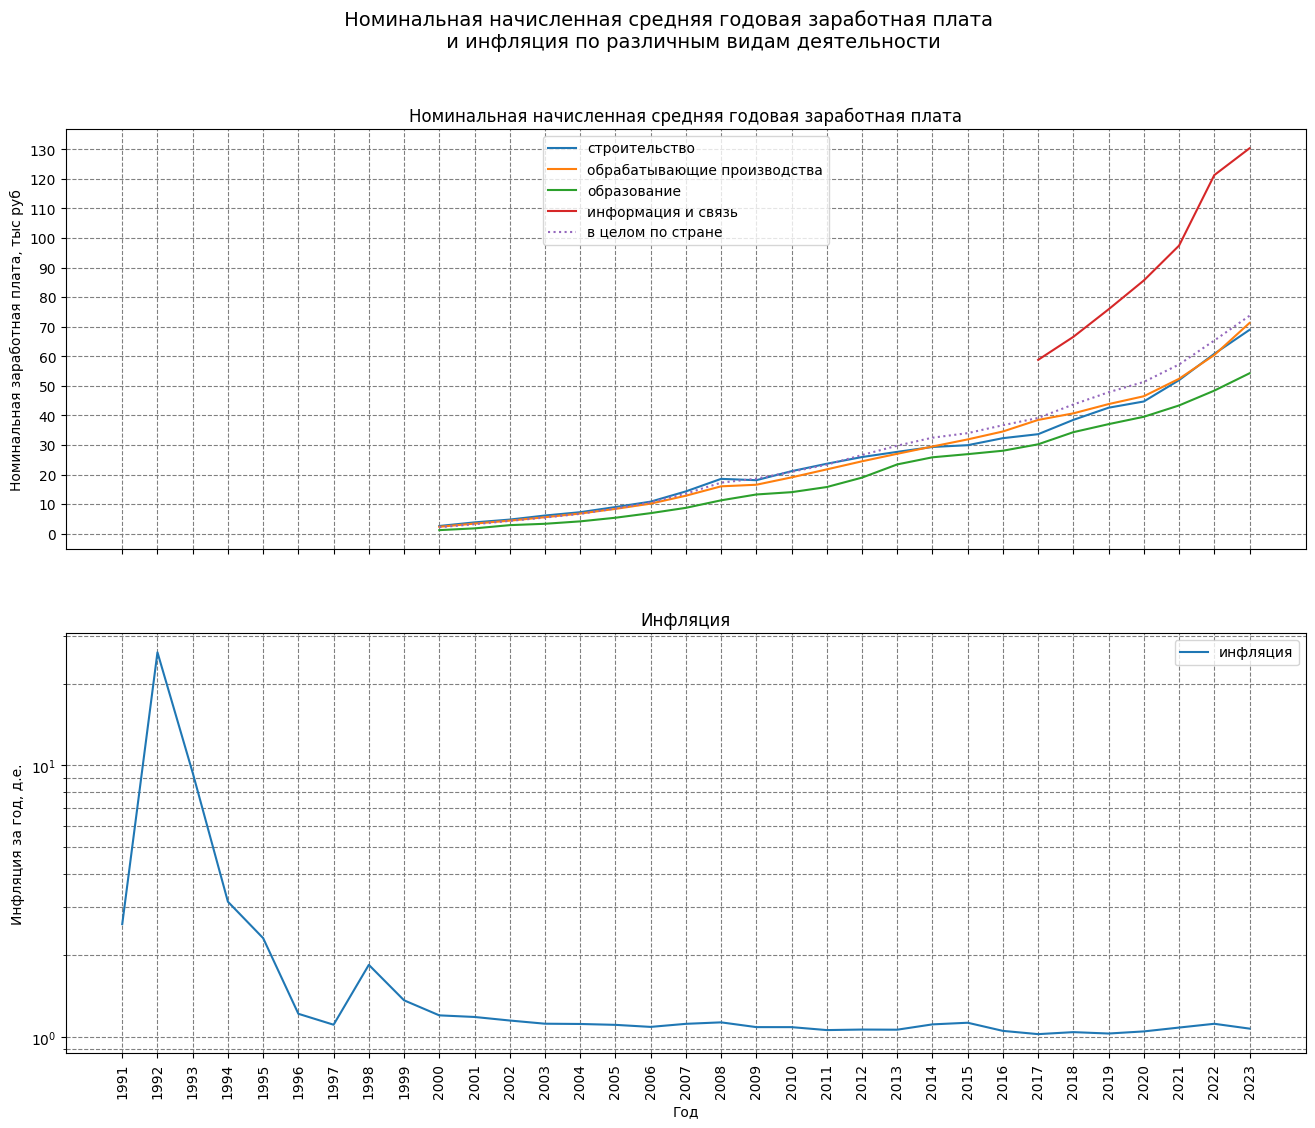

In [4]:
# Посмотрим изменение заработной платы во времени
fig, ax = plt.subplots(ncols=1, nrows=2,
                       figsize=(16, 12),
                       sharex=True,
                       gridspec_kw={'height_ratios': (.5, .5)}
                       )
fig.layout='constrained'
fig.suptitle(
    ''' Номинальная начисленная средняя годовая заработная плата
         и инфляция по различным видам деятельности
    ''',
    fontsize=14
)
ax[0].set_title('Номинальная начисленная средняя годовая заработная плата')
ax[0].grid(color='grey', linestyle='--')
ax[1].set_title('Инфляция')
ax[1].grid(color='grey', which='both', linestyle='--')
ax[0].set_ylabel('Номинальная заработная плата, тыс руб')
ax[0].set_yticks(range(0,131,10))
ax[1].set_ylabel('Инфляция за год, д.е.')
ax[1].set_xlabel('Год')
ax[1].set_xticks(range(1991,2024,1))
ax[1].set_xticklabels(range(1991,2024,1), rotation=90)
ax[0].plot(df['year'], df['building']/1000, label='строительство')
ax[0].plot(df['year'], df['production']/1000, label='обрабатывающие производства')
ax[0].plot(df['year'], df['education']/1000, label='образование')
ax[0].plot(df['year'], df['IT']/1000, label='информация и связь')
ax[0].plot(
    df['year'],
    df['all_economic']/1000,
    label='в целом по стране',
    linestyle='dotted'
)
ax[1].plot(df['year'], df['inflation'], label='инфляция')
ax[1].set_yscale('log')
ax[0].legend(loc='upper center')
ax[1].legend()
plt.show()

Выводы:
- до 2000 года инфляция в некоторые годы была очень высокой и резко изменялась, а в последние 15-20 лет динамика изменения инфляции снизилась;
- заработные платы за период с 2000 года до 2023 года в рассматриваемых видах деятельности выросли многократно, при этом ни разу, кроме 2009 года, не наблюдается снижение заработной платы;
- наименьшие заработные платы из рассматриваемых видов деятельности наблюдаются в сфере образования, на всём рассматриваемом периоде заработные платы в образовании ниже, чем в среднем по всем видам деятельности;
- наибольшие заработные платы из рассматриваемых видов деятельности наблюдаются в сфере информационных технологий и связи, при этом они заметно выше, чем в среднем по всем видам деятельности;
- заработные платы в строительстве до 2014 года превышали заработные платы в обрабатывающем производстве, в период с 2014 года по 2021 год, наоборот, в обрабатывающих производствах заработная плата выше, чем в строительстве. Начиная с 2021 года заработные платы в строительстве и в обрабатывающих производствах ориентировочно одинаковы;
- начиная с 2012 года в строитестве заработные платы ниже, чем средняя по всем видам деятельности;
- начиная с 2005 года в обрабатывающих производствах заработные платы ниже, чем средняя по всем видам деятельности.

## Заработная плата с учётом инфляции

In [5]:
# Приведём все номинальные значения к 2024 году.
# Вычислим коэффициенты для перевода из каждого года
# в 2024 год
df['inflation_koef'] = (df['inflation'])[::-1].cumprod()[::-1]

In [6]:
# Вычислим заработные платы в ценах 2024 года
for area in ['all_economic', 'education', 'production', 'building', 'IT']:
    df[area + '_2024'] = df['inflation_koef'] * df[area]

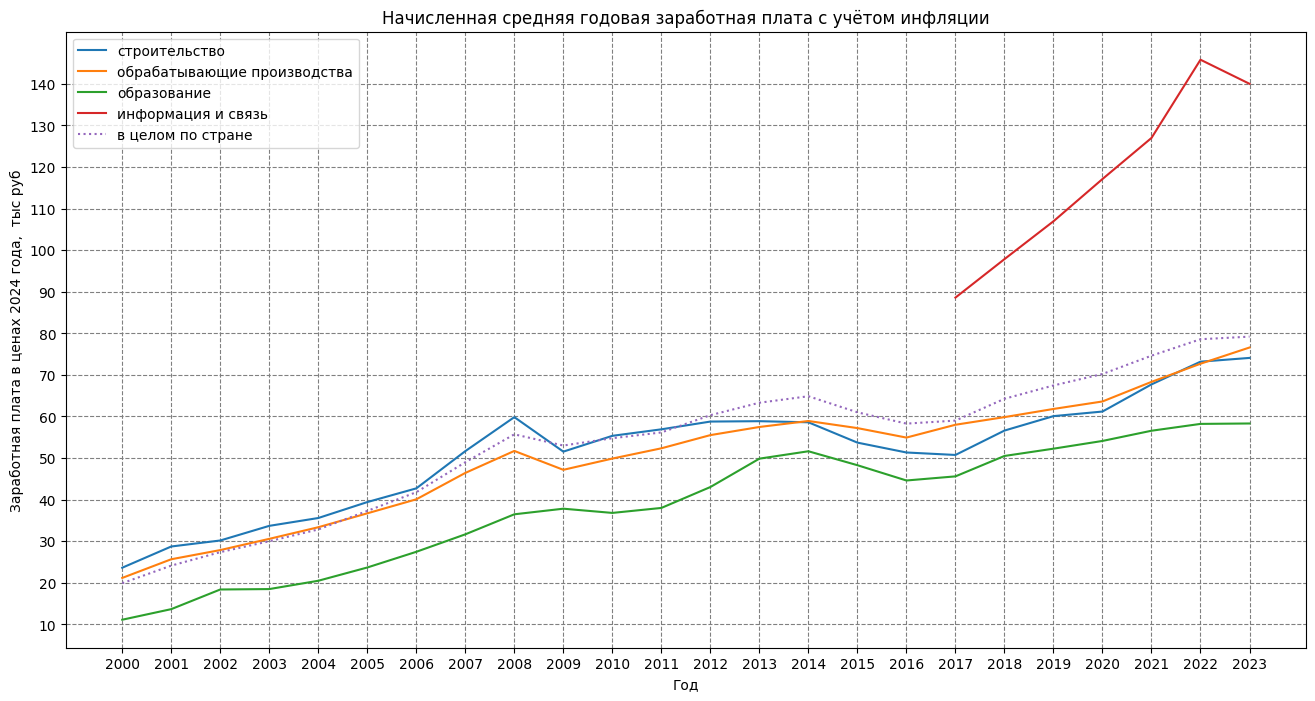

In [7]:
# Посмотрим изменение заработной с учётом инфляции во времени
fig = plt.figure(figsize=(16,8))
plt.title('Начисленная средняя годовая заработная плата с учётом инфляции')
plt.grid(color='grey', linestyle='--')
plt.xlabel('Год')
plt.ylabel('Заработная плата в ценах 2024 года,  тыс руб')
plt.yticks(range(0,150,10))
plt.xticks(range(2000,2024,1))
plt.plot(df['year'], df['building_2024']/1000, label='строительство')
plt.plot(df['year'], df['production_2024']/1000, label='обрабатывающие производства')
plt.plot(df['year'], df['education_2024']/1000, label='образование')
plt.plot(df['year'], df['IT_2024']/1000, label='информация и связь')
plt.plot(df['year'], df['all_economic_2024']/1000,
         label='в целом по стране', linestyle='dotted'
)
plt.legend()
plt.show()

Выводы:
- реальные заработные платы показывают существенно меньшую динамику во времени, при этом наблюдаются периоды снижения, например 2009 год, 2015-2016 годы,
- в 2020 году заработные платы в строительстве соответствуют уровню 2008 года. 

В остальном все выводы, сделанные по номинальным заработным платам справедливы и для реальных заработных плат.

## ВВП, безработица и заработная плата

In [14]:
# приведём значения ВВП к 2024 году и округлим значения
# до 10 трлн руб для уменьшения количества различных значений
df['vvp_2024'] = round(
    (df['vvp'] * df['inflation_koef'])/1e13
)*10

In [18]:
# уровень безработицы округлим до целого значения процентов
df['unemployment_rnd'] = round(
    100 * df['unemployment']
)

In [24]:
avg_salary_pivot = df.pivot_table(index=['vvp_2024'], columns=['unemployment_rnd'],
                                   values=['all_economic_2024'], aggfunc=['mean'])
avg_salary_pivot = round(avg_salary_pivot)

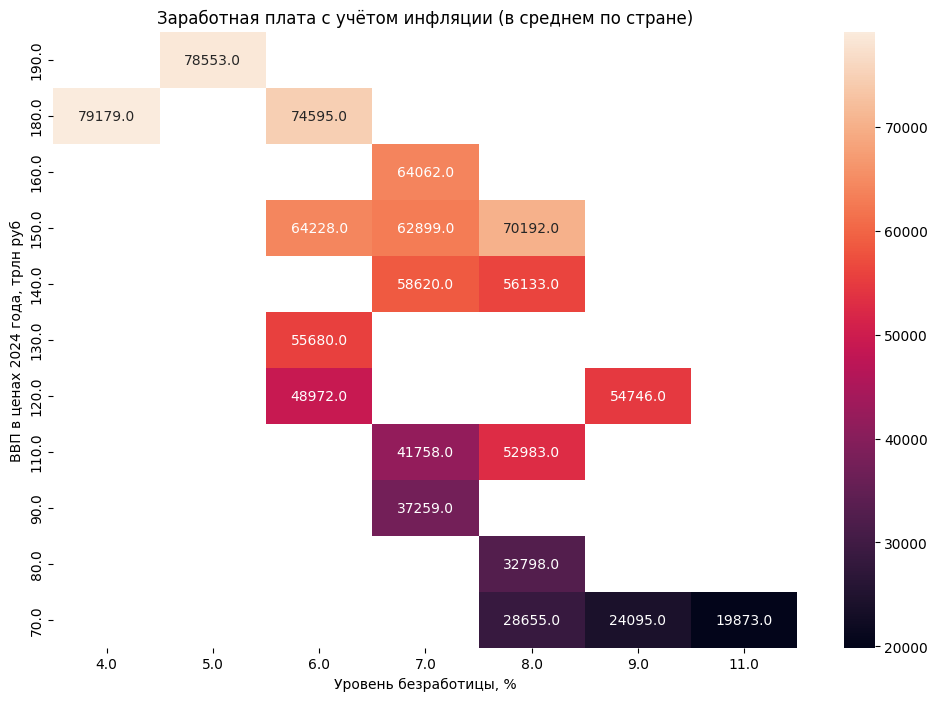

In [25]:
# Построим тепловую карту
plt.figure(figsize=(12, 8))  # задаём размер

# строим тепловую карту
plt.title('Заработная плата с учётом инфляции (в среднем по стране)')
sns.heatmap(
    avg_salary_pivot.values[
        ::-1
    ],  # чтоб снизу были более низкие значения, изменим порядок строк
    xticklabels=[x[2] for x in avg_salary_pivot.columns],
    yticklabels=list(
        avg_salary_pivot.index[::-1]
    ),  # чтоб снизу были более низкие значения, изменим порядок строк
    annot=True,  # добавляем подписи
    ax=plt.gca(),
    fmt='',
)  # задаём исходный формат
plt.xlabel('Уровень безработицы, %')
plt.ylabel('ВВП в ценах 2024 года, трлн руб')
plt.show()

Выводы:
- чем ниже уровень безработицы и выше ВВП, тем выше средняя заработная плата по стране.